<a href="https://colab.research.google.com/github/GabMer/Inteligencia-Artificial/blob/main/OpenCV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook 3: Filtros y efectos básicos en imágenes

# Importamos las librerías necesarias
import cv2  # Importamos OpenCV para procesamiento de imágenes
import numpy as np  # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt  # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow  # Importamos función para mostrar imágenes en Colab

In [ ]:
# Cargar una imagen de ejemplo
from urllib.request import urlopen  # Para abrir URLs

In [ ]:
# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imágenes en formato BGR, lo convertimos a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# 1. Suavizado de imagen con filtro gaussiano
# Aplicamos un filtro gaussiano para suavizar la imagen (kernel de 5x5)
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)  # (5,5) es el tamaño del kernel, 0 es la desviación estándar

In [ ]:
# 2. Filtro de desenfoque medio
# Aplicamos un filtro de promedio para suavizar la imagen (kernel de 5x5)
average_blur = cv2.blur(image_rgb, (5, 5))  # (5,5) es el tamaño del kernel

In [ ]:
# 3. Filtro de desenfoque mediano
# Aplicamos un filtro de mediana para reducir el ruido (tamaño de ventana 5)
median_blur = cv2.medianBlur(image_rgb, 5)  # 5 es el tamaño de la ventana

In [ ]:
# 4. Filtro de desenfoque bilateral
# Este filtro preserva los bordes mientras suaviza las áreas planas
bilateral_blur = cv2.bilateralFilter(image_rgb, 9, 75, 75)  # 9 es el diámetro del vecindario, 75 son sigma color y espacio

In [ ]:
# 5. Ajuste de brillo
# Ajustamos brillo y contraste usando transformacion lineal alpha*img +beta
alpha = 1.5
beta = 30
adjusted = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta) #Aplicamos la transformacion

In [ ]:
# 6. Ecualización de histograma
# Convertimos a escala de grises
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
# Aplicamos ecualización de histograma para mejorar el contraste
equalized = cv2.equalizeHist(gray_image)

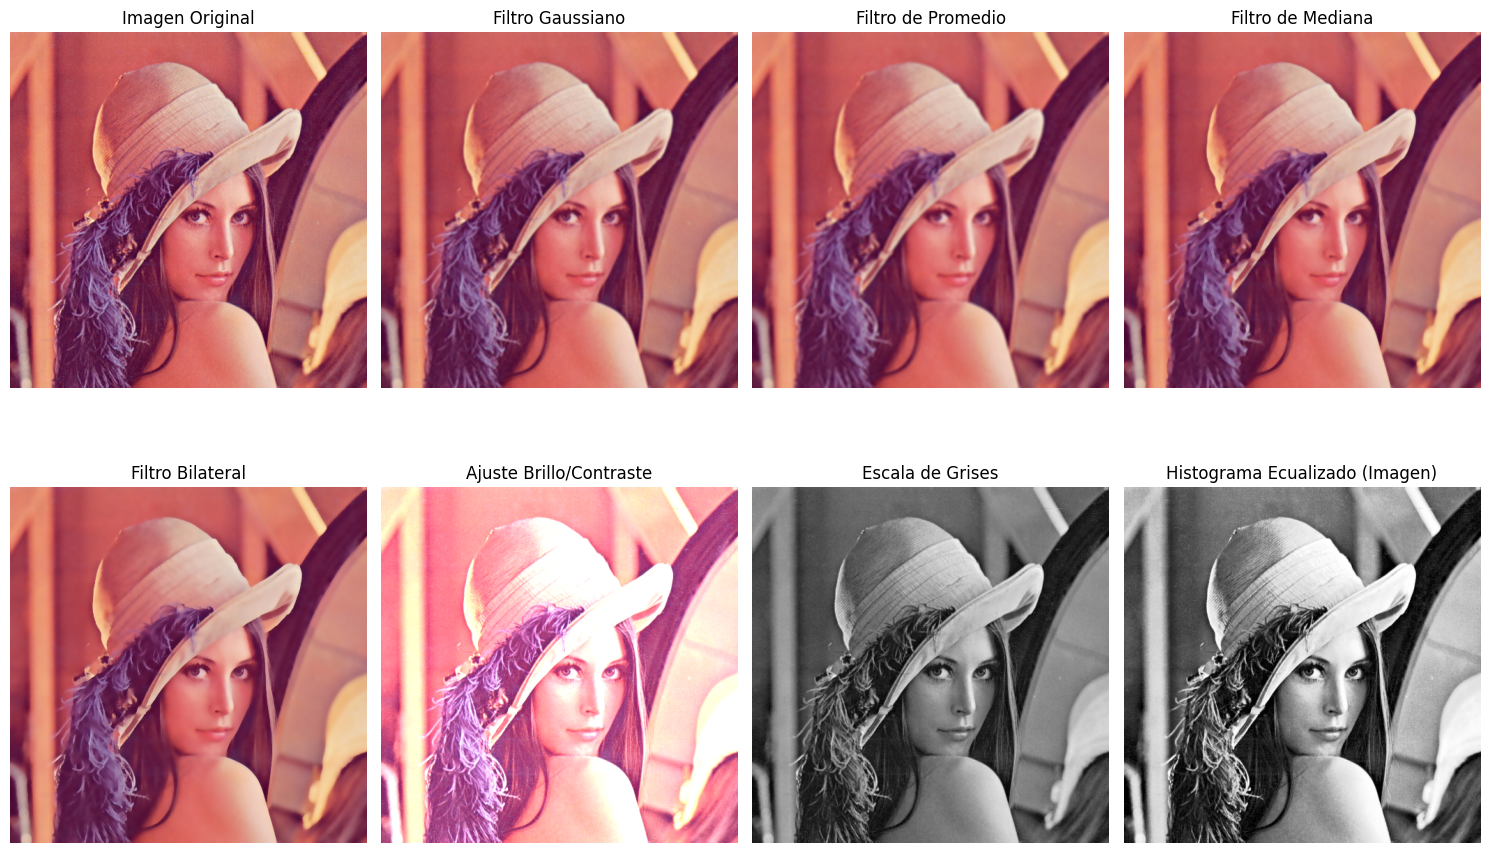

/tmp/ipython-input-1114279961.py:61: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256, [0,256]) # Calculamos y mostramos el Histograma
/tmp/ipython-input-1114279961.py:68: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0,256]) # Calculamos y mostramos el histograma


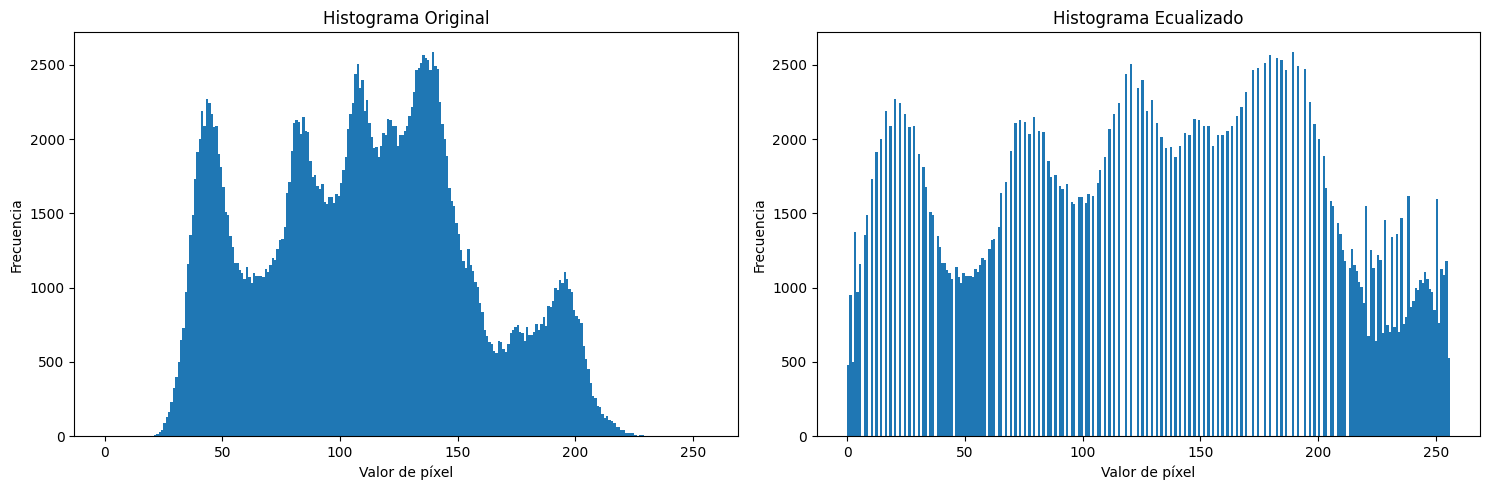

In [ ]:
# Visualización de todos los filtros
plt.figure(figsize=(15, 10))  # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(2, 4, 1)  # Creamos un subplot en la posición 1
plt.title('Imagen Original')  # Añadimos un título
plt.imshow(image_rgb)  # Mostramos la imagen original
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro gaussiano
plt.subplot(2, 4, 2)  # Creamos un subplot en la posición 2
plt.title('Filtro Gaussiano')  # Añadimos un título
plt.imshow(blurred_image)  # Mostramos la imagen con filtro gaussiano
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro de promedio
plt.subplot(2, 4, 3)  # Creamos un subplot en la posición 3
plt.title('Filtro de Promedio')  # Añadimos un título
plt.imshow(average_blur)  # Mostramos la imagen con filtro de promedio
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro de mediana
plt.subplot(2, 4, 4)  # Creamos un subplot en la posición 4
plt.title('Filtro de Mediana')  # Añadimos un título
plt.imshow(median_blur)  # Mostramos la imagen con filtro de mediana
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro bilateral
plt.subplot(2, 4, 5)  # Creamos un subplot en la posición 5
plt.title('Filtro Bilateral')  # Añadimos un título
plt.imshow(bilateral_blur)  # Mostramos la imagen con filtro bilateral
plt.axis('off')  # Ocultamos los ejes

#Imagen con ajuste de brillo y contraste
plt.subplot(2,4,6) # Creamos un subplot en la posición 6
plt. title('Ajuste Brillo/Contraste') # Añadimos un título
plt.imshow(adjusted)  # Mostramos la imagen con ajuste de brillo y contraste
plt.axis('off') # Ocultamos los ejes

#Imagen original en escala de grises
plt.subplot(2,4,7) # Creamos un subplot en la posición 7
plt. title('Escala de Grises') # Añadimos un título
plt.imshow(gray_image, cmap='gray') # Mostramos la imagen en escala de grises
plt.axis('off') # Ocultamos los ejes

# Imagen con ecualizacion de histogramas
plt.subplot(2,4,8) # Creamos un subplot en la posición 8
plt. title('Histograma Ecualizado (Imagen)') # Añadimos un título
plt.imshow(equalized, cmap='gray') # Mostramos la imagen con ecualizacion de histograma
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos\
plt.show() # Mostramos la figura completa

# Visualizacion de Histogramas
plt.figure(figsize=(15,5)) # Creamos una figura con tamaño especifico

# Histograma de la imagen original en escala de grises
plt.subplot(1,2,1) # Creamos un subplot en la posicion 1
plt.title('Histograma Original')
plt.hist(gray_image.ravel(), 256, [0,256]) # Calculamos y mostramos el Histograma
plt.xlabel('Valor de píxel') #Etiqueta eje X
plt.ylabel('Frecuencia') # Etiqueta eje Y

# Histograma de la imagen ecualizada
plt.subplot(1,2,2) # Creamos un subplot en la posición 2
plt.title('Histograma Ecualizado') # Añadimos un título
plt.hist(equalized.ravel(), 256, [0,256]) # Calculamos y mostramos el histograma
plt.xlabel('Valor de píxel') #Etiqueta eje X
plt.ylabel('Frecuencia') # Etiqueta eje Y

plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos\
plt.show() # Mostramos la figura completa

1. Filtro Gaussiano:
    Detectar boroles en un rostro, carreteras elimina imperfecciones
2. Filtro Promedio:
    En procesamiento de Video en tiempo real (baja resolucion)
3. Filtro Mediano:
    Vision Nocturna
4. Filtro Bilateral:
    Reconocimiento de Rostros o de partes puntuales(cosas principales, ejemplo en el rostro: ojos boca al pequeño)
5. Brillo y Contraste:
    Reconocimientos de Placas
6. Ecualizador de Histogramas:
    Radiografias

In [27]:
# 1. Filtro Gabor
ksize = 31  # tamaño del kernel
sigma = 4.0
theta = np.pi/4
lambd = 10.0
gamma = 0.5
phi = 0
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
gabor_filtered = cv2.filter2D(gray_image, cv2.CV_8UC3, gabor_kernel)

# 2. Filtro Laplaciano
laplacian_filtered = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)

# 3. Filtro Sobel (Horizontal y Vertical)
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_filtered = cv2.convertScaleAbs(sobelx + sobely)

# 4. Filtro Scharr (Horizontal y Vertical)
scharrx = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
scharr_filtered = cv2.convertScaleAbs(scharrx + scharry)

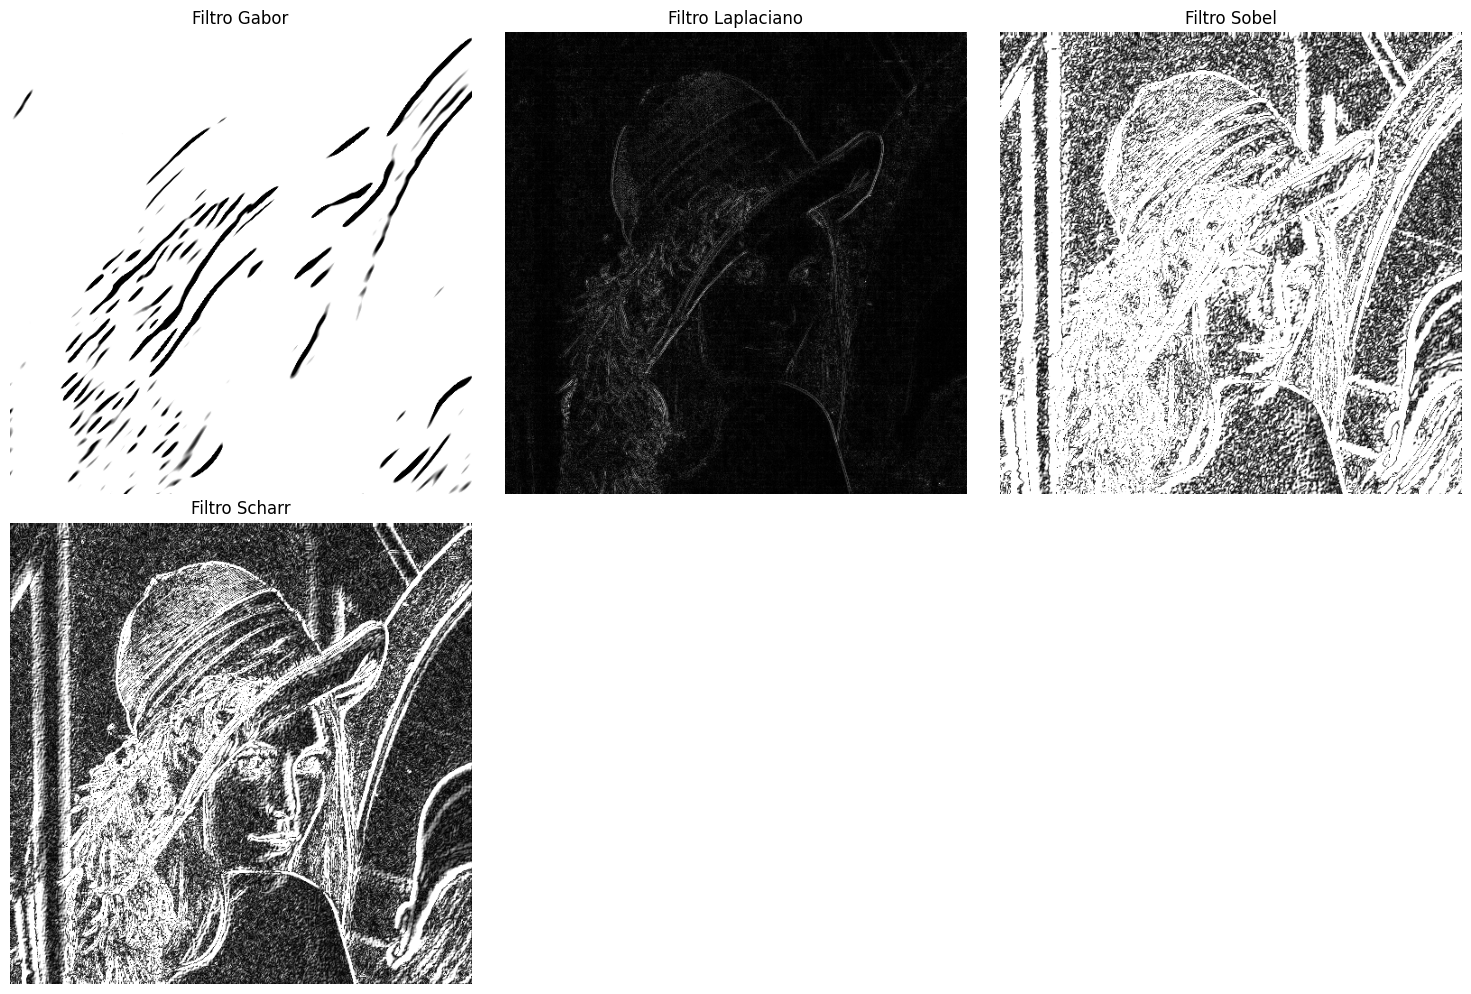

In [32]:
# Visualización de los filtros
plt.figure(figsize=(15,10))

# Filtro Gabor
plt.subplot(2,3,1)
plt.title('Filtro Gabor')
plt.imshow(gabor_filtered, cmap='gray')
plt.axis('off')

# Filtro Laplaciano
plt.subplot(2,3,2)
plt.title('Filtro Laplaciano')
plt.imshow(laplacian_filtered, cmap='gray')
plt.axis('off')

# Filtro Sobel
plt.subplot(2,3,3)
plt.title('Filtro Sobel')
plt.imshow(sobel_filtered, cmap='gray')
plt.axis('off')

# Filtro Scharr
plt.subplot(2,3,4)
plt.title('Filtro Scharr')
plt.imshow(scharr_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**4 filtros que ayuden a la visión artificial**

1. Filtro Gabor

    Combina un filtro gaussiano con ondas sinusoidales para detectar texturas y orientaciones específicas. Ayuda a extraer patrones de textura y dirección en la imagen. Mejora la separación de texturas y líneas repetitivas, y permite realizar reconocimiento de huellas dactilares, análisis de texturas de materiales o detección de patrones arquitectónicos en imágenes.

2. Filtro Laplaciano
    Es un filtro que detecta bordes resaltando cambios abruptos de intensidad en todas las direcciones de la imagen. Ayuda a detectar detalles finos y contornos complejos que otros filtros podrían pasar por alto. Mejora la precisión en la identificación de bordes y pequeñas estructuras, y permite localizar microdefectos o imperfecciones en objetos o materiales, como grietas en metales o circuitos electrónicos.

3. Filtro Sobel (Horizontal/Vertical)
    Calcula el gradiente de intensidad de la imagen en una dirección específica, ya sea horizontal o vertical. Ayuda a detectar bordes con orientación particular, lo que permite distinguir estructuras predominantes en una dirección. Mejora la claridad de las formas y contornos de objetos, y permite diferenciar líneas dominantes, siendo útil en robótica o para analizar suelos y paredes en vehículos autónomos.

4. Filtro Scharr / Gradiente Magnitud
    Es una versión más precisa del Sobel que se enfoca en gradientes pequeños. Ayuda a detectar cambios sutiles de intensidad que pueden ser difíciles de percibir. Mejora la sensibilidad a detalles muy finos, y permite realizar inspecciones precisas en alimentos, tejidos, o superficies delicadas, donde la exactitud es crítica.